In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [30]:

# Initialize an empty list to store DataFrames
all_subjects_dfs = []
df_means = []
    
# Load the subject's DataFrame
df = pd.read_csv(r"W:\Projects\2019-04 M1M1PAS Project\analysis\source_Paolo\fc_source\sourcePhlagsNoConThr.csv",index_col=0)

# Get unique tasks and runs
subjects = df['subject'].unique()
tasks = df['task'].unique()
runs = df['run'].unique()

# Iterate through each task and run combination
for subject in subjects:
    for task in tasks:
        for run in runs:
            
            # Filter the dataframe for the current task and run
            task_run_df = df[(df['subject'] == subject) & (df['task'] == task) & (df['run'] == run)]
            
            # Check if the filtered DataFrame is empty (i.e., no data for this combination)
            if task_run_df.empty:
                print(f"No data for task: {task}, run: {run}. Skipping.")
                continue  # Skip this iteration if no data is available

            # Normalize phase lags to be between 0 and 2*pi
            phase_lag_normalized = task_run_df['phase_lag'] % (2 * np.pi)
            
            # Compute the circular median
            circ_mean_plag = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
            
            df.loc[(df['subject'] == subject) & (df['task'] == task) & (df['run'] == run),'circ_mean_plag'] = circ_mean_plag
            
            df_mean = {'subject_id': subject, 'task': task, 'run': run, 'mean_plag': circ_mean_plag}
            
            df_means.append(df_mean)
        
        
all_subjects_dfs = pd.DataFrame(df_means)

KeyboardInterrupt: 

In [4]:
# Define the folder where the subject-specific CSV files are stored
data_folder = r"W:\Projects\2019-04 M1M1PAS Project\analysis\source_Paolo\fc_source\fc_source"

# Get a list of all the CSV files for the subjects
file_list = [f for f in os.listdir(data_folder)]

all_subjects_dfs = []
df_means = []

# Loop through each file and import the DataFrame
for file in file_list:
    
    # file = file_list[0]

    subject = file.split('_')[0].replace('sub-', '')
    task = file.split('_')[1].replace('task-', '')
    run = file.split('_')[2].replace('run-', '')

    file_path = os.path.join(data_folder, file)
            
    df = pd.read_csv(file_path,index_col=0)
    
    # Normalize phase lags to be between 0 and 2*pi
    phase_lag_normalized = df['phase_lag'] % (2 * np.pi)
    
    # Compute the circular median
    circ_mean_plag = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)
    
    
    
    df['subject'] = subject
    df['task'] = task
    df['run'] = run
    
    all_subjects_dfs.append(df)
    
    df_mean = {'subject_id': subject, 'task': task, 'run': run, 'mean_plag': circ_mean_plag}
    
    df_means.append(df_mean)
    
big_df = pd.concat(all_subjects_dfs, ignore_index=True)
all_mean_dfs = pd.DataFrame(df_means)

In [23]:
big_df[(big_df['subject'] == '2')]

,phase_lag,subject,task,run


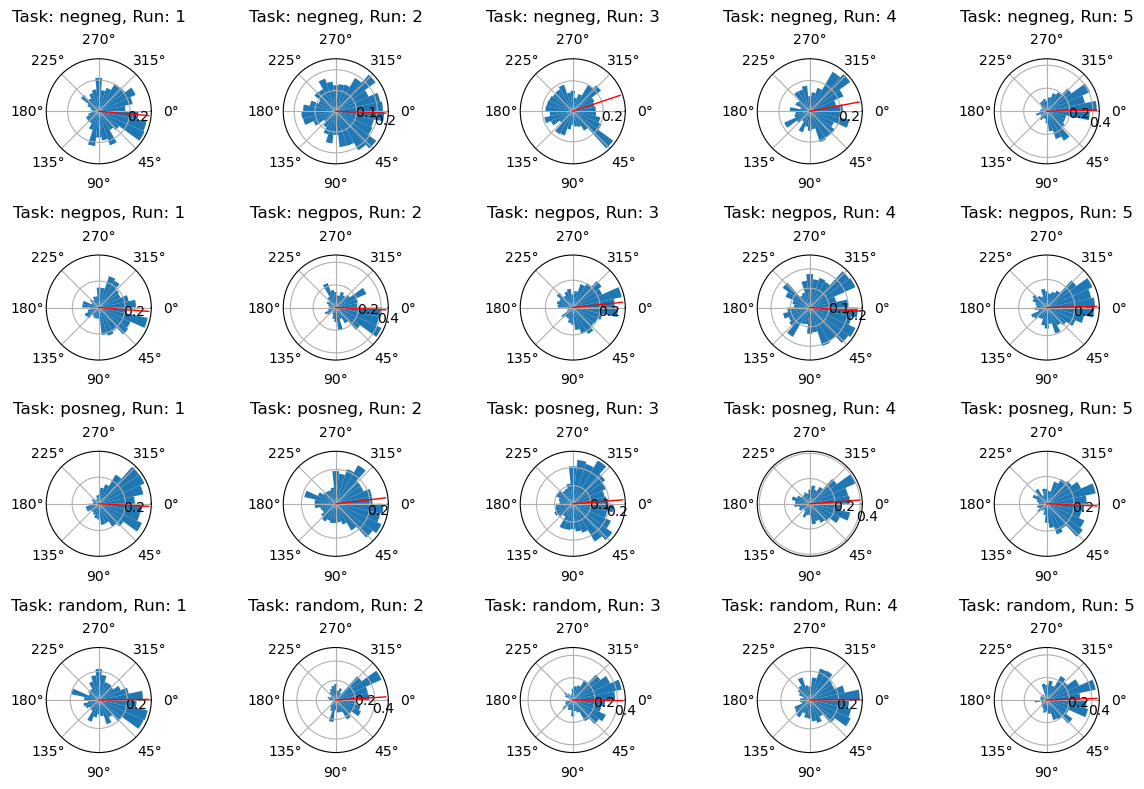

In [5]:
# Step 1: Set the number of bins
n_bins = 30

# Step 2: Get unique tasks and runs
tasks = big_df['task'].unique()
runs = big_df['run'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(len(tasks), len(runs), subplot_kw={'polar': True}, figsize=(12, 8))

# Step 4: Iterate through each task and run combination
for i, task in enumerate(tasks):
    for j, run in enumerate(runs):
        
        # Filter the dataframe for the current task and run
        task_run_df = big_df[(big_df['subject'] == '1') & (big_df['task'] == task) & (big_df['run'] == run)]
        
        # Check if the filtered DataFrame is empty (i.e., no data for this combination)
        if task_run_df.empty:
            print(f"No data for task: {task}, run: {run}. Skipping.")
            continue  # Skip this iteration if no data is available

        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = task_run_df['phase_lag'] % (2 * np.pi)

        # Compute the histogram
        counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)
        
        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subplot
        ax = axes[i][j]
        ax.bar(bin_centers, counts, width=width, align='center')

        # Set title and labels
        ax.set_title(f'Task: {task}, Run: {run}', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        # Compute the circular mean
        circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Plot the median line
        ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

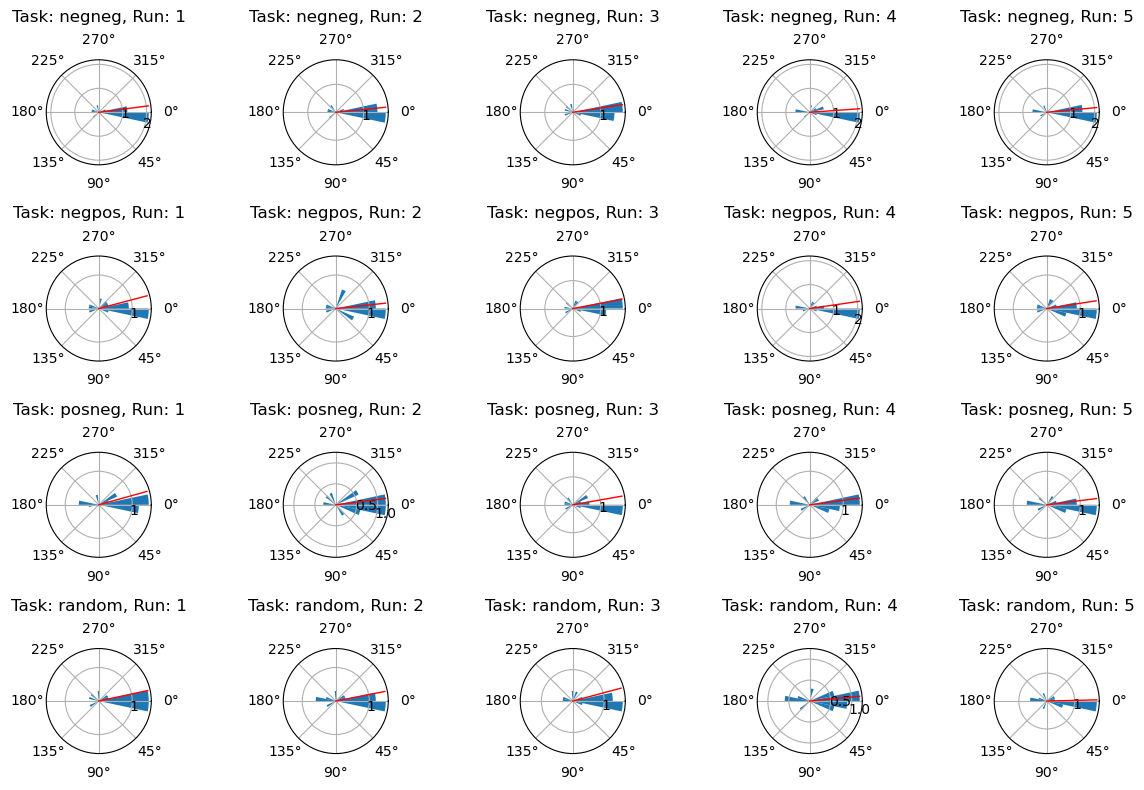

In [12]:
# Step 1: Set the number of bins
n_bins = 30

# Step 2: Get unique tasks and runs
tasks = all_mean_dfs['task'].unique()
runs = all_mean_dfs['run'].unique()

# Step 3: Create subplots: rows = tasks, columns = runs
fig, axes = plt.subplots(len(tasks), len(runs), subplot_kw={'polar': True}, figsize=(12, 8))

# If there's only one task or run, wrap axes in a list for consistent iteration
if len(tasks) == 1:
    axes = [axes]
if len(runs) == 1:
    axes = [[ax] for ax in axes]
    

def calculate_circular_median(signal):
    median_cos = np.median(np.cos(signal))
    median_sin = np.median(np.sin(signal))
    x = np.arctan2(median_sin,median_cos)
    return x

# Step 4: Iterate through each task and run combination
for i, task in enumerate(tasks):
    for j, run in enumerate(runs):
        
        # task = tasks[3]
        # run = runs[2]
        # i = 0
        # j = 0
        
        # Filter the dataframe for the current task and run
        task_run_df = all_mean_dfs[(all_mean_dfs['task'] == task) & (all_mean_dfs['run'] == run)]
        
                # Check if the filtered DataFrame is empty (i.e., no data for this combination)
        if task_run_df.empty:
            print(f"No data for task: {task}, run: {run}. Skipping.")
            continue  # Skip this iteration if no data is available

        # Normalize phase lags to be between 0 and 2*pi
        phase_lag_normalized = task_run_df['mean_plag'] % (2 * np.pi)

        # Compute the histogram
        counts, bin_edges = np.histogram(phase_lag_normalized, bins=n_bins, range=(0, 2 * np.pi), density=True)
        

        # Convert bin edges to bin centers for polar plotting
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        width = bin_edges[1] - bin_edges[0]  # Calculate the width

        # Plot the histogram in the current subplot
        ax = axes[i][j]
        ax.bar(bin_centers, counts, width=width, align='center')

        # Set title and labels
        ax.set_title(f'Task: {task}, Run: {run}', va='bottom')
        ax.set_theta_zero_location('E')  # Set 0 radians (north) on the top
        ax.set_theta_direction(-1)  # Set the direction of theta to go clockwise
        
        # Compute the circular median
        #circular_median = calculate_circular_median(phase_lag_normalized)
        circular_mean = stats.circmean(phase_lag_normalized, high=2*np.pi, low=0)

        # Plot the median line
        ax.plot([circular_mean, circular_mean], [0, max(counts)], color='red', linewidth=1)


# Adjust layout
plt.tight_layout()
plt.show()